# Redes Neuronales
## Trabajo Práctico N° 1 - Ejercicio 2
* Kammann, Lucas Agustín
* Gaytan, Joaquín Oscar

### Consultas y/o dudas
* Es lógico glucosa = 0?
* Estimar probabilidades de un valor determinado en VAC



### To do
* Agregar cantidad de ceros por variable
* Detección y remoción de Outliers
* Boxplots
* Explicación probabilística del clasificador


# Descripción del problema
Se busca desarrollar un clasificador para poder predcir la aparición de diabetes en un individuo a partir de algunas de sus características biológicas. Dicha clasificación se realiza a partir del Prima Indians Diabetes Dataset, pereteneciente al National Institute of Diabetes and Digestive and Kidney Diseases. Esta base de datos comprende pacientes femeninos de al menos 21 años de edad, de herencia Prima Indian.

* INSERTAR CÓMO SE RESUELVE EL PROBLEMA A NIVEL PROBABILÍSTICO.

# Análisis y filtrado de la base de datos

En primer lugar, se importa la base de datos mencionada anteriormente para poder ser procesada. Además se muestran las primeras filas.

In [1]:
import pandas as pd

# Read database from .csv
df = pd.read_csv('../assets/diabetes.csv', delimiter=',')

# Show first rows of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Como se observa en la tabla anterior, las variables a considerar para estimar la presencia de diabetes en una persona son las siguientes:

*   Pregnancies (embarazos): Número de embarazos
*   Glucose: Concentración de glucosa en sangre a 2 horas de una prueba de tolerancia de glucosa oral.
*   BloodPresure (Presión sanguinea): Presión diastólica (mm Hg)
*   SkinThickness: Tamaño del pliegue de la piel del triceps
*   Insulin: Insulina en sangre a 2 horas (mu U/ml)
*   BMI: Indice de masa corporal (peso en kg / (altura en metros)^2)
*   DiabetesPedigreeFunction: Una función que estima el likelihood de tener diabetes dado el historial familiar
*   Age: Edad (años)
*   Outcome: Variable 0 o 1 (0 no posee diabtes, 1 posee diabetes)

Antes de comenzar con el análisis estadístico de cada una de estas variables es necesario filtrar aquellos valores que no fueron informados. De lo contrario, estos valores sin sentido afectarán el desempeño del modelo al realizar la predicción.

## Filtrado de datos inválidos

In [2]:
# Show database variables and their characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# Describing database
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


De la tabla anterior se aprecia que hay ciertas variables biológicas que adoptan valores inválidos. Por ejemplo, la presión sanguínea no puede ser nula. Lo mismo sucede con la glucosa, el grosor de la piel, el nivel de insulina, el ínidice de masa corporal. Luego, se reemplazan aquellos valores sin sentido por un NaN (not a number) para evitar que sean contemplados al realizar el análisis estadístico posterior.

In [4]:
import numpy as np

# Filtering Glucose values
df['Glucose'].replace(0, np.nan, inplace=True)

# Filtering Blood Pressure values
df['BloodPressure'].replace(0, np.nan, inplace=True)

# Filtering Skin Thickness values
df['SkinThickness'].replace(0, np.nan, inplace=True)

# Filtering Insulin values
df['Insulin'].replace(0, np.nan, inplace=True)

# Filtering Body Mass Index values
df['BMI'].replace(0, np.nan, inplace=True)

# Describing filtered dataset characterisics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Análisis de variables
Para cada variable involucrada se realiza un análisis estadístico, diferenciando entre aquellos casos positivos en diabetes y aquellos que no lo son.
### Embarazos ("Pregnancies")

In [5]:
import matplotlib.pyplot as plt

df["Pregnancies"].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

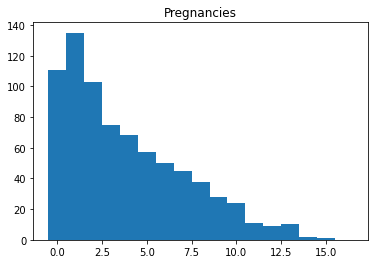

In [29]:
# Bins for discrete variable
pregBins = np.arange(-0.5,df["Pregnancies"].max()+0.5,1)
plt.hist(df['Pregnancies'], bins = pregBins)
x = plt.title("Pregnancies")

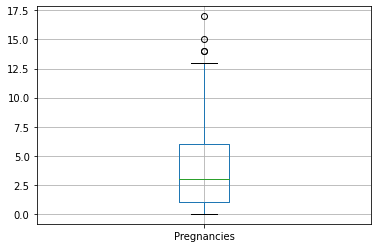

In [40]:
# Boxplot
df.boxplot(column=['Pregnancies'],return_type='axes');

In [45]:
from scipy import stats
# Removing outliers from category
pregZScores = np.absolute(stats.zscore(df['Pregnancies']))
outliers = np.array(df['Pregnancies'][pregZScores >= 3])



In [33]:
# Pregnancies in diabetes-negative
df[df['Outcome'] == 0]['Pregnancies'].describe()

count    500.000000
mean       3.298000
std        3.017185
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       13.000000
Name: Pregnancies, dtype: float64

In [34]:
# Pregnancies in diabetes-positive
df[df['Outcome'] == 1]['Pregnancies'].describe()

count    268.000000
mean       4.865672
std        3.741239
min        0.000000
25%        1.750000
50%        4.000000
75%        8.000000
max       17.000000
Name: Pregnancies, dtype: float64

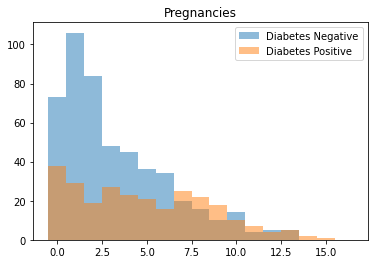

In [11]:
# Histograms

# Plotting histograms
plt.hist(df[df['Outcome'] == 0]['Pregnancies'], bins = pregBins, alpha=0.5, label='Diabetes Negative')
plt.hist(df[df['Outcome'] == 1]['Pregnancies'], bins = pregBins, alpha=0.5, label='Diabetes Positive')
plt.legend(loc='upper right')
x = plt.title('Pregnancies')

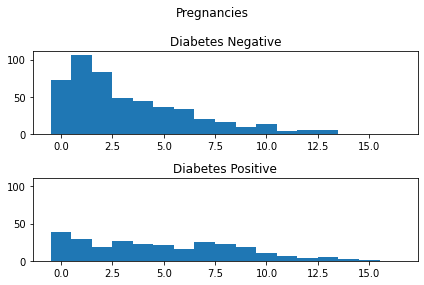

In [51]:
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
fig.suptitle('Pregnancies')
axs[0].hist(df[df['Outcome'] == 0]['Pregnancies'], bins = pregBins)
axs[0].set_title('Diabetes Negative')
axs[1].hist(df[df['Outcome'] == 1]['Pregnancies'], bins = pregBins)
x = axs[1].set_title('Diabetes Positive')

### Glucosa ("Glucose")

In [13]:
df['Glucose'].describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

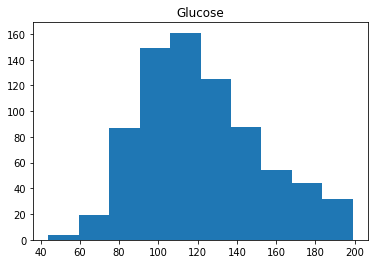

In [32]:
# Histogram 
plt.hist(df['Glucose'])
x = plt.title('Glucose')

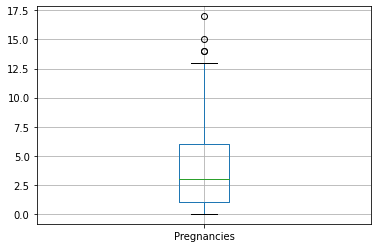

In [39]:
# Boxplot
df.boxplot(column=['Pregnancies'],return_type='axes');

In [56]:
# Filter outliers

In [35]:
# Glucose in diabetes-negative
df[df['Outcome'] == 0]['Glucose'].describe()

count    497.000000
mean     110.643863
std       24.776906
min       44.000000
25%       93.000000
50%      107.000000
75%      125.000000
max      197.000000
Name: Glucose, dtype: float64

In [46]:
# Glucose in diabetes-positive
df[df['Outcome'] == 1]['Glucose'].describe()

count    266.000000
mean     142.319549
std       29.599199
min       78.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

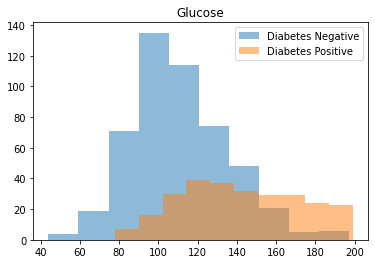

In [48]:
# Histograms

# Plotting histograms
plt.hist(df[df['Outcome'] == 0]['Glucose'],  alpha=0.5, label='Diabetes Negative')
plt.hist(df[df['Outcome'] == 1]['Glucose'],  alpha=0.5, label='Diabetes Positive')
plt.legend(loc='upper right')
x = plt.title('Glucose')

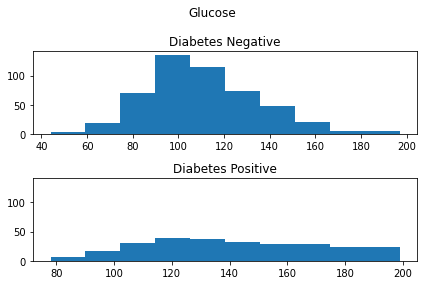

In [50]:
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
fig.suptitle('Glucose')
axs[0].hist(df[df['Outcome'] == 0]['Glucose'])
axs[0].set_title('Diabetes Negative')
axs[1].hist(df[df['Outcome'] == 1]['Glucose'])
x = axs[1].set_title('Diabetes Positive')

### Presión Sanguínea ("BloodPressure")

In [52]:
df['BloodPressure'].describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

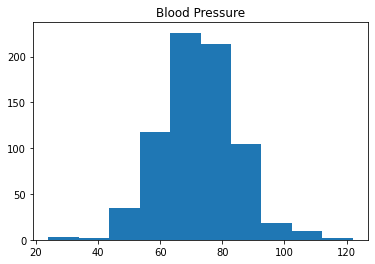

In [54]:
# Histogram 
plt.hist(df['BloodPressure'])
x = plt.title('Blood Pressure')

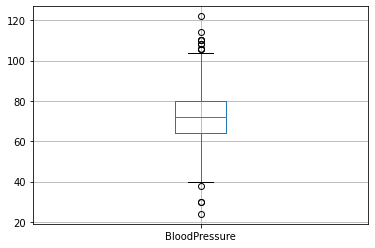

In [55]:
# Boxplot
df.boxplot(column=['BloodPressure'],return_type='axes');

In [57]:
# Filter outliers

In [58]:
# Blood pressure in diabetes-negative
df[df['Outcome'] == 0]['BloodPressure'].describe()

count    481.000000
mean      70.877339
std       12.161223
min       24.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [59]:
# Blood pressure in diabetes-positive
df[df['Outcome'] == 1]['BloodPressure'].describe()

count    252.000000
mean      75.321429
std       12.299866
min       30.000000
25%       68.000000
50%       74.500000
75%       84.000000
max      114.000000
Name: BloodPressure, dtype: float64

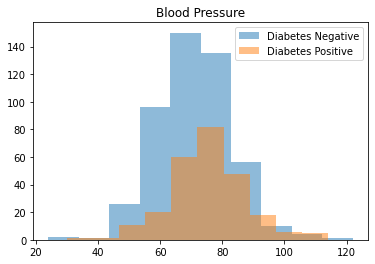

In [60]:
# Histograms

# Plotting histograms
plt.hist(df[df['Outcome'] == 0]['BloodPressure'],  alpha=0.5, label='Diabetes Negative')
plt.hist(df[df['Outcome'] == 1]['BloodPressure'],  alpha=0.5, label='Diabetes Positive')
plt.legend(loc='upper right')
x = plt.title('Blood Pressure')

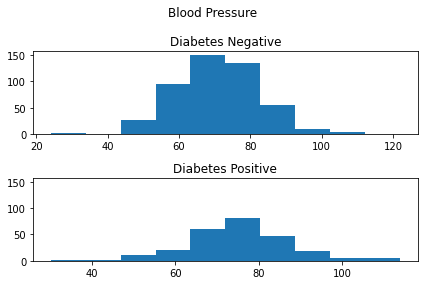

In [61]:
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
fig.suptitle('Blood Pressure')
axs[0].hist(df[df['Outcome'] == 0]['BloodPressure'])
axs[0].set_title('Diabetes Negative')
axs[1].hist(df[df['Outcome'] == 1]['BloodPressure'])
x = axs[1].set_title('Diabetes Positive')

### Grosor de la piel del pliegue del tríceps ("SkinThickness")

In [62]:
df['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

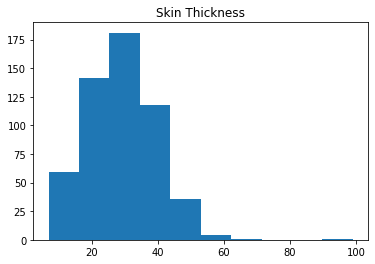

In [63]:
# Histogram 
plt.hist(df['SkinThickness'])
x = plt.title('Skin Thickness')

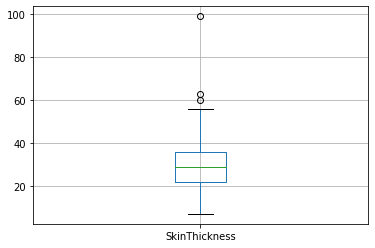

In [64]:
# Boxplot
df.boxplot(column=['SkinThickness'],return_type='axes');

In [ ]:
# Filter outliers

In [65]:
# Skin Thickness in diabetes-negative
df[df['Outcome'] == 0]['SkinThickness'].describe()

count    361.000000
mean      27.235457
std       10.026491
min        7.000000
25%       19.000000
50%       27.000000
75%       33.000000
max       60.000000
Name: SkinThickness, dtype: float64

In [66]:
# Skin Thickness in diabetes-positive
df[df['Outcome'] == 1]['SkinThickness'].describe()

count    180.000000
mean      33.000000
std       10.327595
min        7.000000
25%       27.000000
50%       32.000000
75%       39.000000
max       99.000000
Name: SkinThickness, dtype: float64

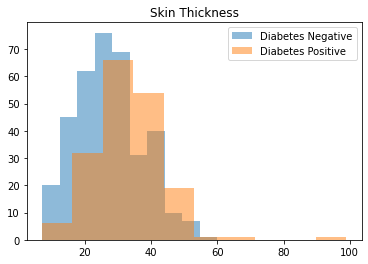

In [75]:
# Histograms

# Plotting histograms
plt.hist(df[df['Outcome'] == 0]['SkinThickness'],  alpha=0.5, label='Diabetes Negative')
plt.hist(df[df['Outcome'] == 1]['SkinThickness'],  alpha=0.5, label='Diabetes Positive')
plt.legend(loc='upper right')
x = plt.title('Skin Thickness')

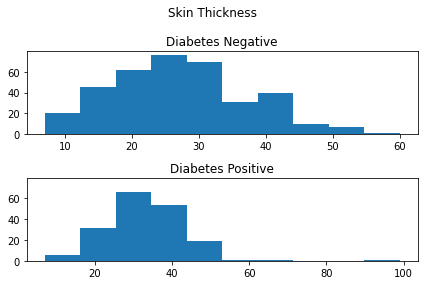

In [68]:
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
fig.suptitle('Skin Thickness')
axs[0].hist(df[df['Outcome'] == 0]['SkinThickness'])
axs[0].set_title('Diabetes Negative')
axs[1].hist(df[df['Outcome'] == 1]['SkinThickness'])
x = axs[1].set_title('Diabetes Positive')

### Insulina ("Insulin")

In [69]:
df['Insulin'].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

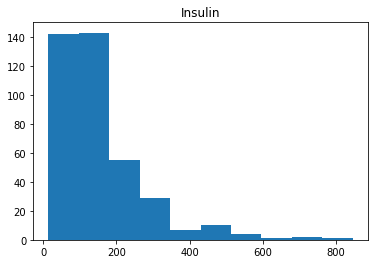

In [70]:
# Histogram 
plt.hist(df['Insulin'])
x = plt.title('Insulin')

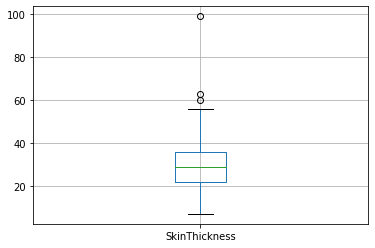

In [71]:
# Boxplot
df.boxplot(column=['SkinThickness'],return_type='axes');

In [ ]:
# Filter Outliers

In [72]:
# Insulin in diabetes-negative
df[df['Outcome'] == 0]['Insulin'].describe()

count    264.000000
mean     130.287879
std      102.482237
min       15.000000
25%       66.000000
50%      102.500000
75%      161.250000
max      744.000000
Name: Insulin, dtype: float64

In [73]:
# Insulin in diabetes-positive
df[df['Outcome'] == 1]['Insulin'].describe()

count    130.000000
mean     206.846154
std      132.699898
min       14.000000
25%      127.500000
50%      169.500000
75%      239.250000
max      846.000000
Name: Insulin, dtype: float64

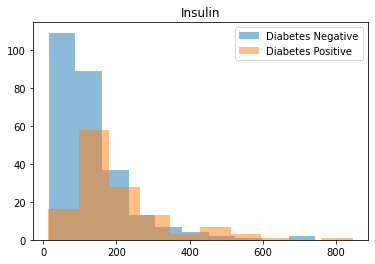

In [78]:
# Histograms

# Plotting histograms
plt.hist(df[df['Outcome'] == 0]['Insulin'],  alpha=0.5, label='Diabetes Negative')
plt.hist(df[df['Outcome'] == 1]['Insulin'],  alpha=0.5, label='Diabetes Positive')
plt.legend(loc='upper right')
x = plt.title('Insulin')

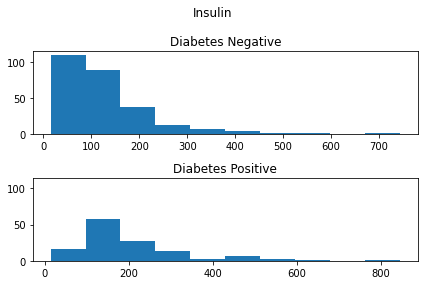

In [77]:
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
fig.suptitle('Insulin')
axs[0].hist(df[df['Outcome'] == 0]['Insulin'])
axs[0].set_title('Diabetes Negative')
axs[1].hist(df[df['Outcome'] == 1]['Insulin'])
x = axs[1].set_title('Diabetes Positive')

### Índice de Masa Corporal ("BMI")

In [80]:
df['BMI'].describe()

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

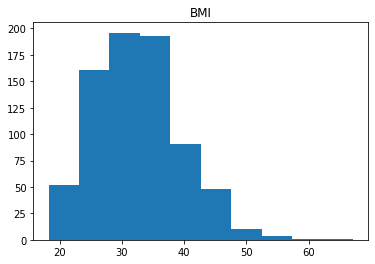

In [82]:
# Histogram 
plt.hist(df['BMI'])
x = plt.title('BMI')

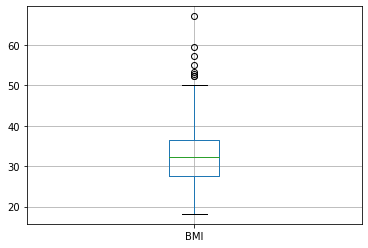

In [83]:
# Boxplot
df.boxplot(column=['BMI'],return_type='axes');

In [84]:
# Filter Outliers

In [85]:
# BMI in diabetes-negative
df[df['Outcome'] == 0]['BMI'].describe()

count    491.000000
mean      30.859674
std        6.560737
min       18.200000
25%       25.600000
50%       30.100000
75%       35.300000
max       57.300000
Name: BMI, dtype: float64

In [86]:
# BMI in diabetes-posiitve
df[df['Outcome'] == 1]['BMI'].describe()

count    266.000000
mean      35.406767
std        6.614982
min       22.900000
25%       30.900000
50%       34.300000
75%       38.925000
max       67.100000
Name: BMI, dtype: float64

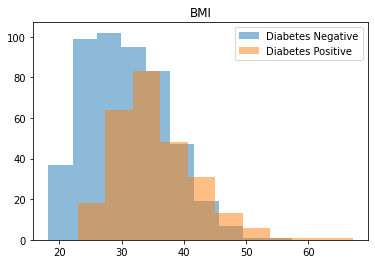

In [87]:
# Histograms

# Plotting histograms
plt.hist(df[df['Outcome'] == 0]['BMI'],  alpha=0.5, label='Diabetes Negative')
plt.hist(df[df['Outcome'] == 1]['BMI'],  alpha=0.5, label='Diabetes Positive')
plt.legend(loc='upper right')
x = plt.title('BMI')

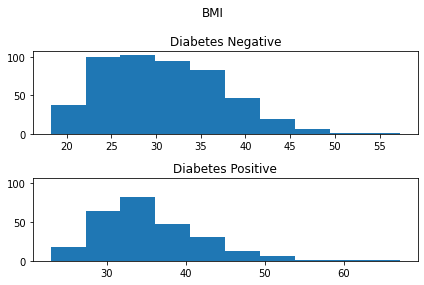

In [88]:
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
fig.suptitle('BMI')
axs[0].hist(df[df['Outcome'] == 0]['BMI'])
axs[0].set_title('Diabetes Negative')
axs[1].hist(df[df['Outcome'] == 1]['BMI'])
x = axs[1].set_title('Diabetes Positive')

### Diabetes Pedigree Function (DiabetesPedigreeFunction)

In [89]:
df['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

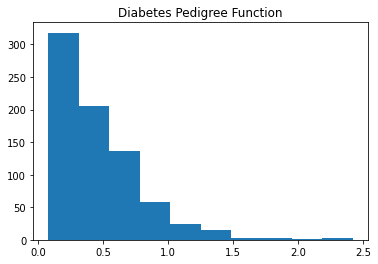

In [90]:
# Histogram 
plt.hist(df['DiabetesPedigreeFunction'])
x = plt.title('Diabetes Pedigree Function')

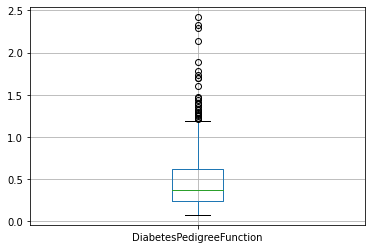

In [91]:
# Boxplot
df.boxplot(column=['DiabetesPedigreeFunction'],return_type='axes');

In [92]:
# Filter outliers

In [93]:
# Diabetes Pedigree Function in diabetes-negative
df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].describe()

count    500.000000
mean       0.429734
std        0.299085
min        0.078000
25%        0.229750
50%        0.336000
75%        0.561750
max        2.329000
Name: DiabetesPedigreeFunction, dtype: float64

In [94]:
# Diabetes Pedigree Function in diabetes-positive
df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].describe()

count    268.000000
mean       0.550500
std        0.372354
min        0.088000
25%        0.262500
50%        0.449000
75%        0.728000
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

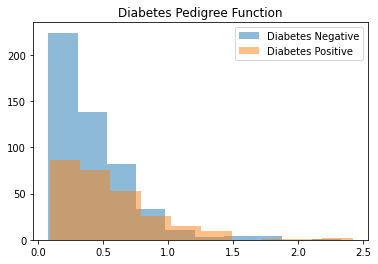

In [95]:
# Histograms

# Plotting histograms
plt.hist(df[df['Outcome'] == 0]['DiabetesPedigreeFunction'],  alpha=0.5, label='Diabetes Negative')
plt.hist(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'],  alpha=0.5, label='Diabetes Positive')
plt.legend(loc='upper right')
x = plt.title('Diabetes Pedigree Function')

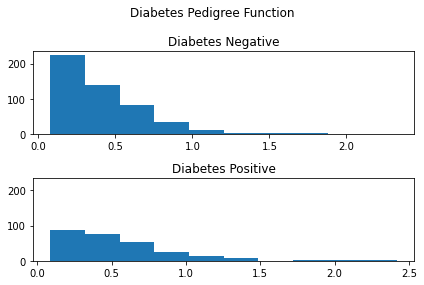

In [96]:
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
fig.suptitle('Diabetes Pedigree Function')
axs[0].hist(df[df['Outcome'] == 0]['DiabetesPedigreeFunction'])
axs[0].set_title('Diabetes Negative')
axs[1].hist(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'])
x = axs[1].set_title('Diabetes Positive')

### Edad (Age)

In [97]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

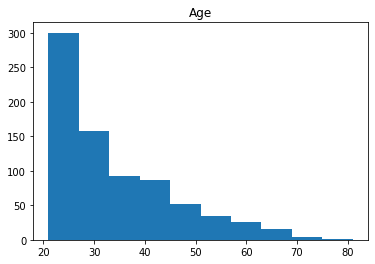

In [100]:
# Histogram 
plt.hist(df['Age'])
x = plt.title('Age')

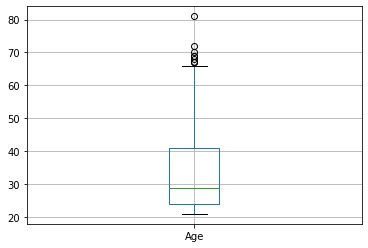

In [103]:
# Boxplot
df.boxplot(column=['Age'],return_type='axes');

In [104]:
# Filter outliers

In [105]:
# Age in diabetes-negative
df[df['Outcome'] == 0]['Age'].describe()

count    500.000000
mean      31.190000
std       11.667655
min       21.000000
25%       23.000000
50%       27.000000
75%       37.000000
max       81.000000
Name: Age, dtype: float64

In [106]:
# Age in diabetes-positive
df[df['Outcome'] == 1]['Age'].describe()

count    268.000000
mean      37.067164
std       10.968254
min       21.000000
25%       28.000000
50%       36.000000
75%       44.000000
max       70.000000
Name: Age, dtype: float64

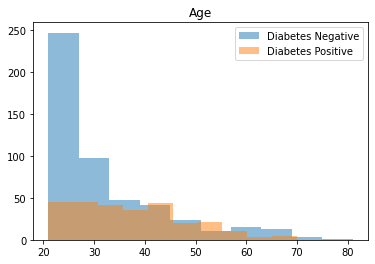

In [107]:
# Histograms

# Plotting histograms
plt.hist(df[df['Outcome'] == 0]['Age'],  alpha=0.5, label='Diabetes Negative')
plt.hist(df[df['Outcome'] == 1]['Age'],  alpha=0.5, label='Diabetes Positive')
plt.legend(loc='upper right')
x = plt.title('Age')

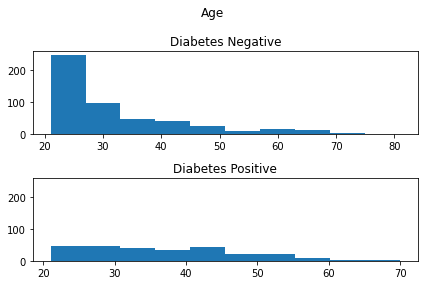

In [108]:
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
fig.suptitle('Age')
axs[0].hist(df[df['Outcome'] == 0]['Age'])
axs[0].set_title('Diabetes Negative')
axs[1].hist(df[df['Outcome'] == 1]['Age'])
x = axs[1].set_title('Diabetes Positive')